In [1]:
# asume que los datos estan en ../data/<año>.csv.bz2
# fixme: poner el directorio de data que esté en el repo cuando pusheen los pibes

import seaborn as sns
import matplotlib.pyplot as plt

import fnmatch

import pandas as pd
import time
import os
import shutil
#sns.set(color_codes=True)

# load data
tmp_dir = "./tmp_csv/"
#years = ["2006", "2007"]
years = ["2007"]

## Procesar datos

In [2]:
#crear directorio con data de delays agrupada por retraso 
if not os.path.exists(tmp_dir):
    os.makedirs(tmp_dir)

for year in years:
    if not os.path.exists(tmp_dir+year+".csv"):
        print("Leyendo csv: {}".format(year))
        t = time.time()
        df = pd.read_csv("../data/"+year+".csv.bz2", compression="bz2", usecols=["Month", "Year", "DayofMonth", "DayOfWeek", "DepDelay"], encoding="ISO 8859-1")

        #formato mas feliz para fechas
        dates = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth, format='%Y%m%d')
        df["date"] = dates
        df = df[["date", "Year", "DepDelay"]]

        #sacamos outliers
        low = 0.25
        high = 0.75
        qiles = df.groupby("date")["DepDelay"].quantile([low, high]).unstack(level=1)
        mask =  (qiles.loc[df.date, low] < df.DepDelay.values) & \
                (df.DepDelay.values < qiles.loc[df.date, high])
        df = df.loc[mask.values]

        #agrupamos
        df = df.groupby(by=df['date'].dt.date).mean()
        df.to_csv(tmp_dir+year+".csv")
        del df

Leyendo csv: 2007


2007.csv


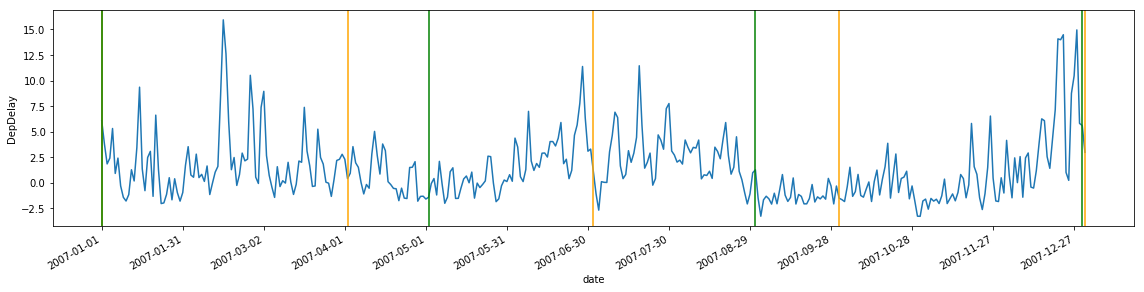

,date,Year,DepDelay
0,2007-01-01,2007,6.063566
1,2007-01-02,2007,3.784369
2,2007-01-03,2007,1.839338
3,2007-01-04,2007,2.407876
4,2007-01-05,2007,5.305987
5,2007-01-06,2007,0.906083
6,2007-01-07,2007,2.406726
7,2007-01-08,2007,-0.313942
8,2007-01-09,2007,-1.431127
9,2007-01-10,2007,-1.794950


In [3]:
for filename in os.listdir(tmp_dir):
    if filename.endswith(".csv") and filename != "merged.csv":
        print(filename)
        df = pd.read_csv(tmp_dir+filename)
        fig, ax = plt.subplots(figsize=(16,4))
        sns.lineplot(x=df.date, y=df.DepDelay, linestyle='-')
        plt.xticks(plt.xticks()[0], df.date, rotation=90)
        plt.tight_layout()
        xticks = ax.xaxis.get_major_ticks()
        for i in range(len(xticks)):
            if i%30 != 0:
                xticks[i].set_visible(False)
            if i%int((len(xticks))/4) == 0:
                plt.axvline(x=i, color="orange")
            if i%int((len(xticks))/3) == 0:
                plt.axvline(x=i, color="green")
        fig.autofmt_xdate()
        plt.show()
df
#Trimestres en verde, cuatrimestres en naranja

In [4]:
#merge
df = pd.DataFrame(columns=["date", "DepDelay", "ArrDelay"])
for filename in os.listdir(tmp_dir):
    if filename.endswith(".csv") and filename != "merged.csv":
        print(filename)
        df_input = pd.read_csv(tmp_dir+filename)
        df = pd.concat([df, df_input], sort=False)
df.to_csv(tmp_dir+"merged.csv")

2007.csv


In [5]:
df = pd.read_csv(tmp_dir+"merged.csv")
df.plot(x="date", y="DepDelay", linestyle='-', figsize=(16,4))

## CML acá 

In [6]:
delays = df["DepDelay"]
print(delays)
len(delays)

0       6.063566
1       3.784369
2       1.839338
3       2.407876
4       5.305987
5       0.906083
6       2.406726
7      -0.313942
8      -1.431127
9      -1.794950
10     -1.168186
11      1.267059
12      0.170029
13      3.428102
14      9.351214
15      1.352268
16     -0.781478
17      2.468185
18      3.066725
19     -1.336557
20      6.614333
21      1.310207
22     -2.044032
23     -1.980340
24     -1.145218
25      0.488270
26     -1.677247
27      0.383858
28     -0.978121
29     -1.804295
         ...    
335     4.143992
336     0.696892
337    -1.480362
338     2.428700
339     0.004719
340     2.556589
341    -1.421814
342     2.429442
343     2.910348
344    -0.431584
345    -0.527913
346     1.181363
347     3.791323
348     6.250000
349     6.070439
350     2.545575
351     1.407476
352     4.261114
353     7.136330
354    14.080652
355    13.996442
356    14.486245
357     1.006365
358     0.229452
359     8.741007
360    10.467172
361    14.957241
362     5.8045

365

In [7]:
import numpy as np
import math

n = 5
phases = [i*math.pi/2 for i in range(4)]

# semanas, meses, bimestres, trimestres, cuatrimestres, semestres, años
freqs =  [7] + [355/i for i in [12, 6, 4, 3, 2, 1]]

def trig_vals(t):
    return  [math.sin(2 * math.pi / f * t + p) for f in freqs for p in phases] + \
            [math.cos(2 * math.pi / f * t + p) for f in freqs for p in phases]

A = np.array([])
arrays = []
for i in range(len(delays)):
    row = np.array([i**p for p in range(n+1)] + trig_vals(i))
    arrays.append(row)

A = np.stack(arrays)

coefs = np.linalg.lstsq(A, delays, rcond=None)[0]
coefs_normal = np.linalg.solve(A.T@A, A.T@delays)


In [8]:

from cml import svd_solver as ss
coefs_svd = ss.lstsq(A, delays)

from cml import normal_equations_solver as nes
coefs_nes = nes.lstsq(A, delays)

from cml import qr_solver as qr_fast
coefs_qr_fast = qr_fast.lstsq(A, delays)
from cml import qr_col_pivot_solver as qr_col
coefs_qr_col = qr_col.lstsq(A, delays)
from cml import qr_full_pivot_solver as qr_full
coefs_qr_full = qr_full.lstsq(A, delays)


In [9]:
df["dl_pred"] = A@coefs
df["dl_pred_normal"] = A@coefs_normal

df["dl_pred_nes"] = A@coefs_nes
df["dl_pred_svd"] = A@coefs_svd

df["dl_pred_qr"] = A@coefs_qr_fast
df["dl_pred_qr_col"] = A@coefs_qr_col
df["dl_pred_qr_full"] = A@coefs_qr_full

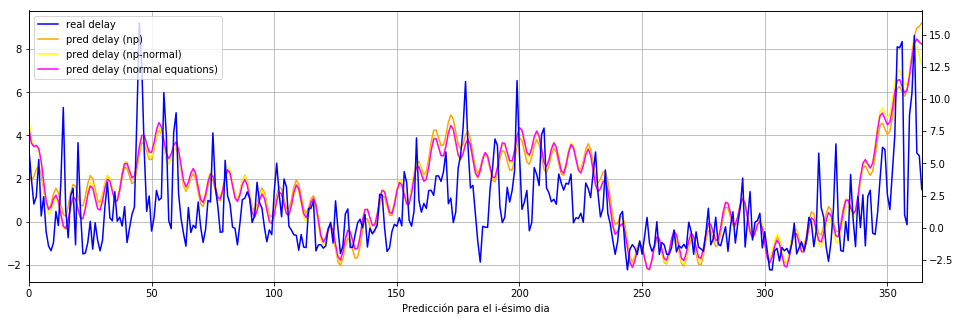

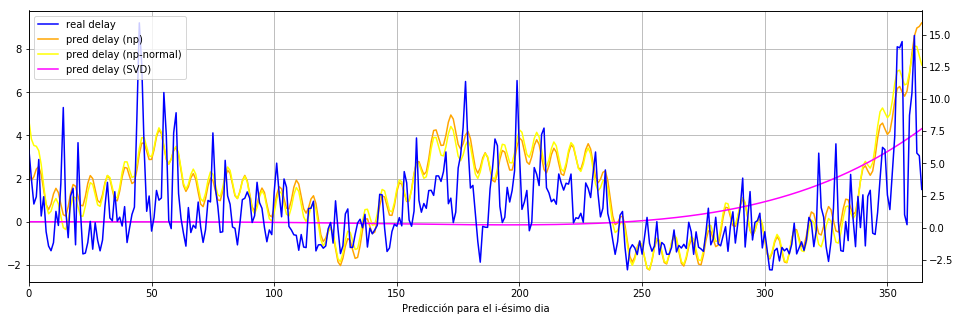

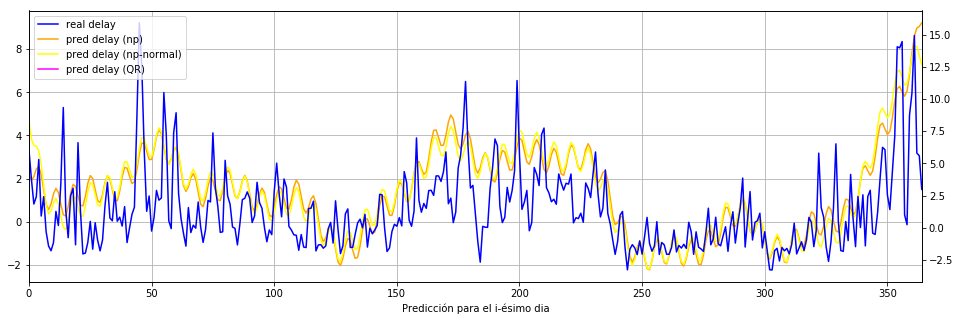

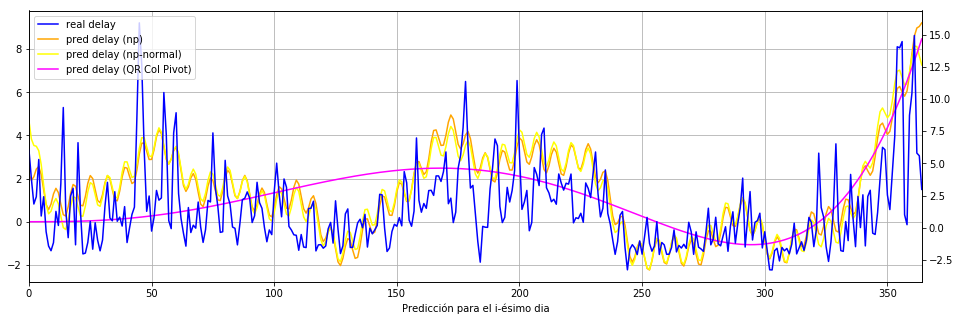

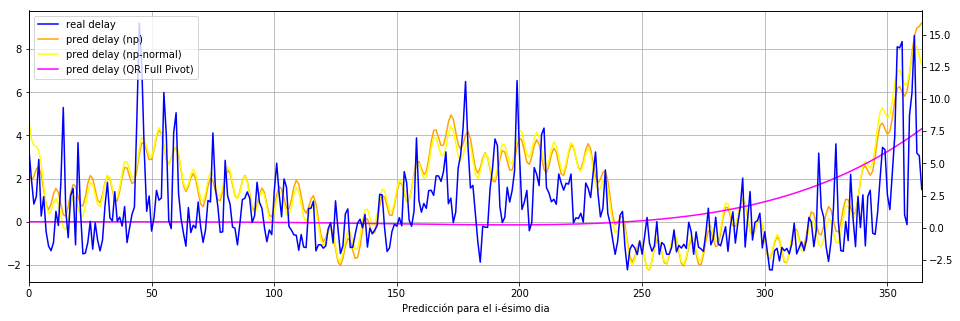

In [10]:
def plot_impl(impl_df, impl_label):

    plt.clf()

    plt.figure(figsize=(16,5))
    plt.xlabel('Predicción para el i-ésimo dia')

    ax1 = df.DepDelay.plot(color='blue', grid=True, secondary_y=True, label='real delay')
    ax2 = df.dl_pred.plot(color='orange', grid=True, label='pred delay (np)')
    ax3 = df.dl_pred_normal.plot(color='yellow', grid=True, label='pred delay (np-normal)')

    ax4 = df[impl_df].plot(color='magenta', grid=True, label=impl_label)

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

    plt.legend(h1+h2, l1+l2, loc=2)
    plt.show()

plot_impl("dl_pred_nes", "pred delay (normal equations)")
plot_impl("dl_pred_svd", "pred delay (SVD)")
plot_impl("dl_pred_qr", "pred delay (QR)")
plot_impl("dl_pred_qr_col", "pred delay (QR Col Pivot)")
plot_impl("dl_pred_qr_full", "pred delay (QR Full Pivot)")


In [19]:
import numpy as np
import math

max_grade = 1
phases = [i*math.pi/2 for i in range(4)]

# semanas, meses, bimestres, trimestres, cuatrimestres, semestres, años
freqs =  [7] + [355/i for i in [12, 6, 4, 3, 2, 1]]

class lsqPredictor:
    def __init__(self, phases, freqs, max_grade):
        self.phases = phases
        self.freqs = freqs
        self.max_grade = max_grade

    def get_params(self, deep=True):
        """función necesaria para que sklearn lo trate como un estimador. Se puede usar en cross validations & shit"""
        pars={}
        pars["phases"] = self.phases
        pars["freqs"] = self.freqs
        pars["max_grade"] = self.max_grade
        return pars

    def set_params(self, pars):
        """función necesaria para que sklearn lo trate como un estimador. Se puede usar en cross validations & shit"""
        self.phases =    pars["phases"]
        self.freqs =     pars["freqs"]
        self.max_grade = pars["max_grade"]

    def trig_vals(self, t):
        return  [math.sin(2 * math.pi / f * t + p) for f in self.freqs for p in self.phases]

    def get_x_vals(self, x):
        x_vals = []
        for i in range(len(x)):
            row = np.array([i**p for p in range(self.max_grade+1)] + self.trig_vals(i), dtype='float')
            x_vals.append(row)
        return x_vals

    def fit(self, X_train, y_train, **fit_params):
        A = np.stack(X_train)
        self.coefs = np.linalg.solve(A.T@A, A.T@y_train)

    def predict(self, pred_set):
        arrays = self.get_x_vals(pred_set)
        full_A = np.stack(arrays)
        return full_A@self.coefs

In [20]:

from sklearn.model_selection import TimeSeriesSplit
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

lsq = lsqPredictor(phases, freqs, max_grade)
tscv = TimeSeriesSplit(n_splits=3)

scores = cross_val_score(lsq, lsq.get_x_vals(df["DepDelay"]), df["DepDelay"], cv = tscv, scoring=make_scorer(mean_squared_error))

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 13.28 (+/- 5.95)


## BORRAR ARCHIVOS

In [ ]:
#borrar aux de años
for filename in os.listdir(tmp_dir):
    if fnmatch.fnmatch(filename, '*.csv') and filename != "merged.csv":
        os.remove(tmp_dir+filename)

In [ ]:
#borrar tmp
shutil.rmtree(tmp_dir)